In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = train_data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

## Exploratory Data Analysis (EDA)

In [8]:
# Get numerical columns (int and float types)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get categorical columns (object type)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("Numeric features:", numeric_features)
print()
print("Categorical features:", categorical_features)

Numeric features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Categorical features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percent": missing_percent})
missing_data.sort_values("Percent", ascending=False)


,Missing Values,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


### 1. categorical column

In [11]:
# Loop through each categorical column
for col in categorical_features:
    print("--"*20)
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].nunique()}")
    print("Value counts:")
    print(df[col].value_counts().head(10))  # show top 10 most frequent categories
    print("--"*20)

----------------------------------------

Column: Name
Unique values: 891
Value counts:
Name
Braund, Mr. Owen Harris                            1
Boulos, Mr. Hanna                                  1
Frolicher-Stehli, Mr. Maxmillian                   1
Gilinski, Mr. Eliezer                              1
Murdlin, Mr. Joseph                                1
Rintamaki, Mr. Matti                               1
Stephenson, Mrs. Walter Bertram (Martha Eustis)    1
Elsbury, Mr. William James                         1
Bourke, Miss. Mary                                 1
Chapman, Mr. John Henry                            1
Name: count, dtype: int64
----------------------------------------
----------------------------------------

Column: Sex
Unique values: 2
Value counts:
Sex
male      577
female    314
Name: count, dtype: int64
----------------------------------------
----------------------------------------

Column: Ticket
Unique values: 681
Value counts:
Ticket
347082          7
CA. 2343   

### 2. numeric column 

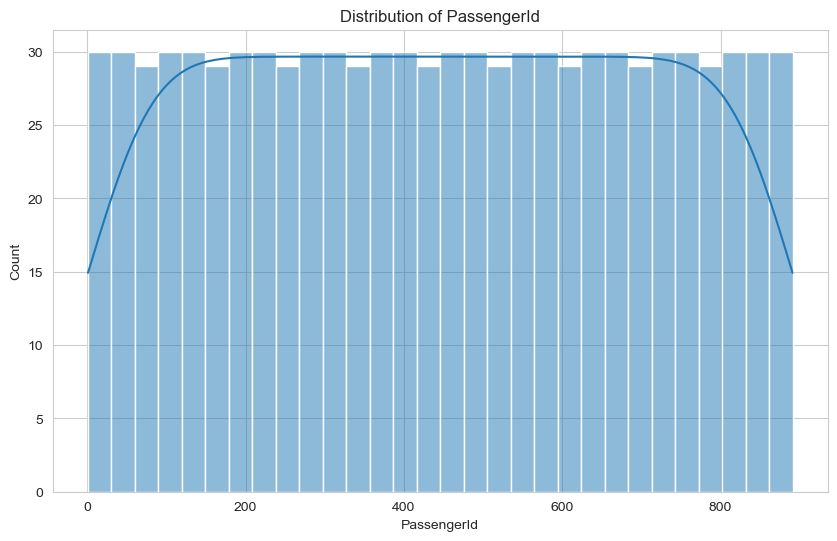

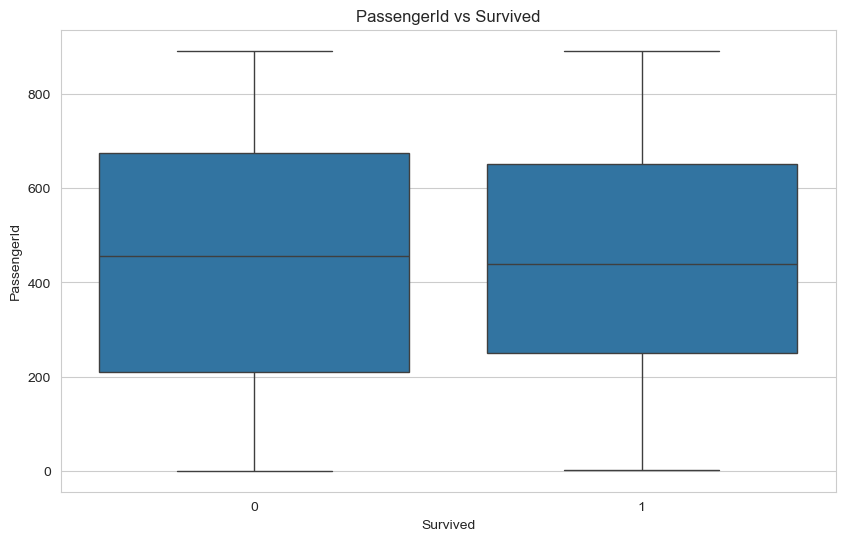

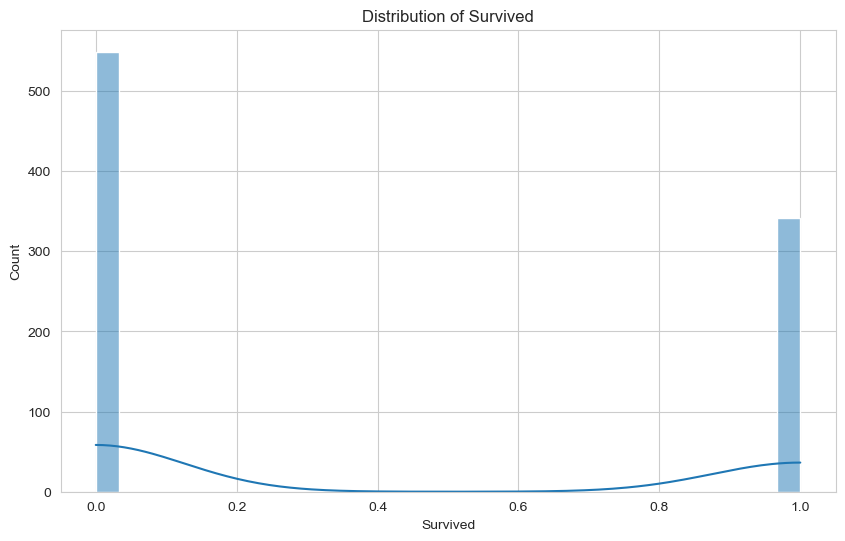

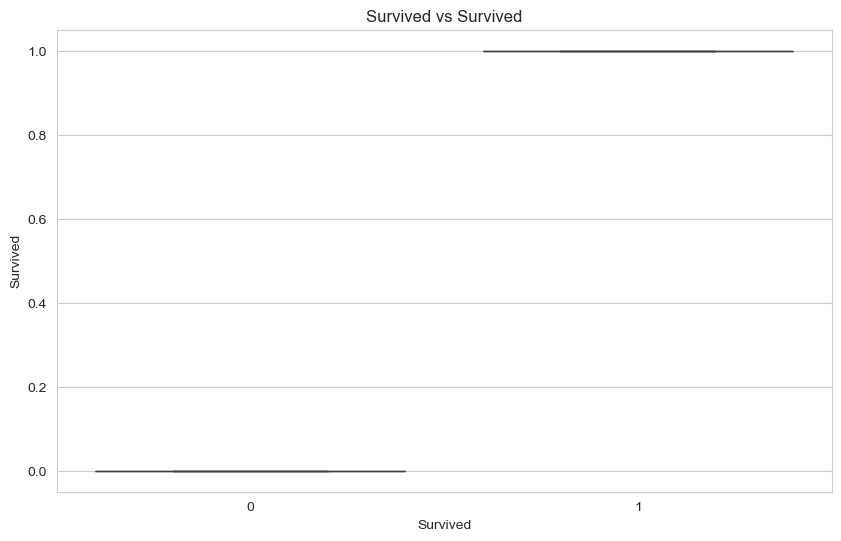

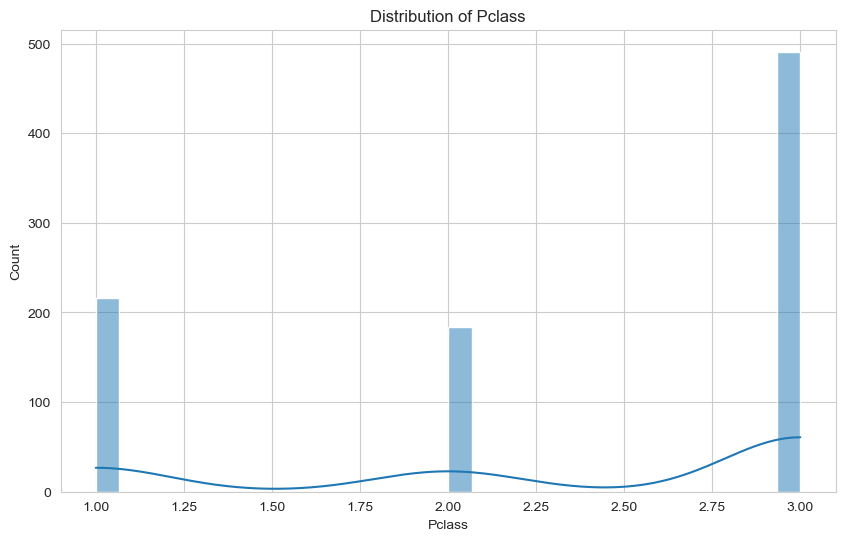

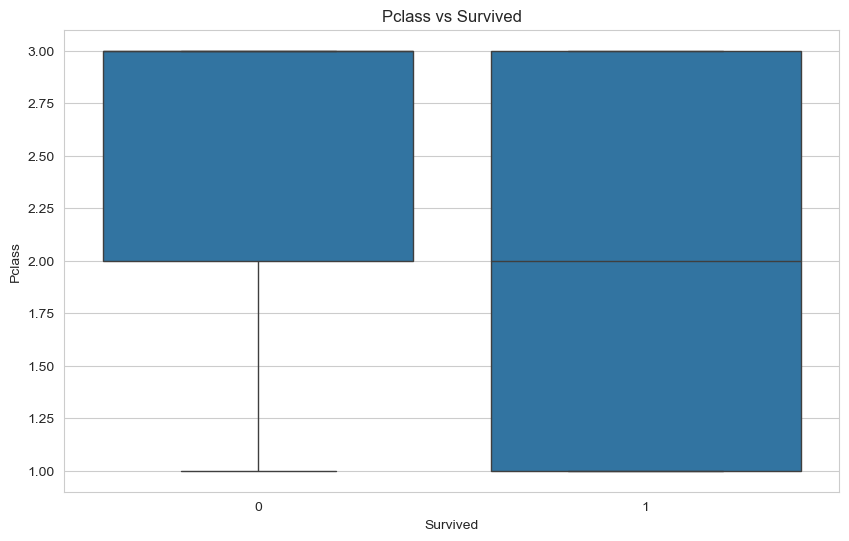

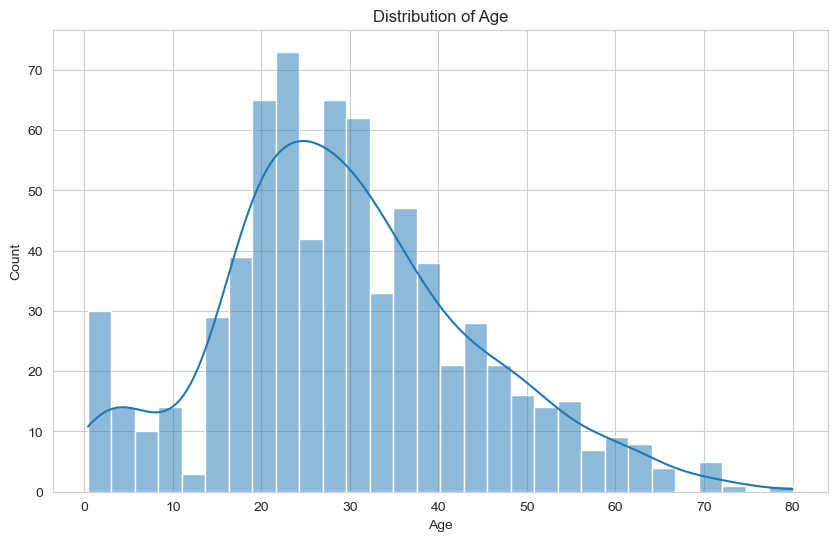

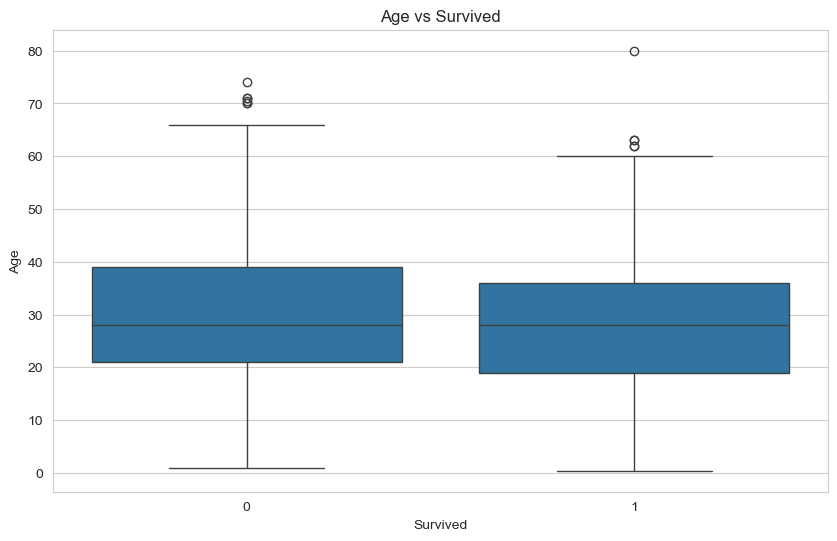

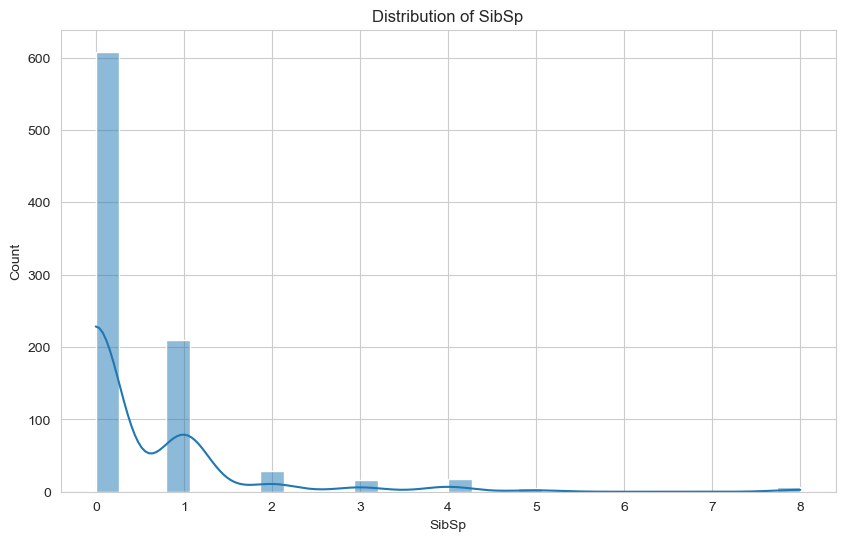

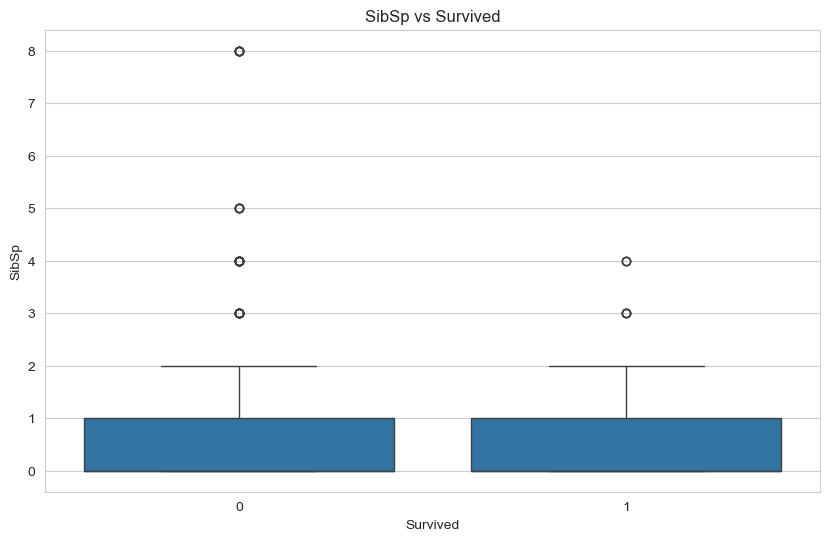

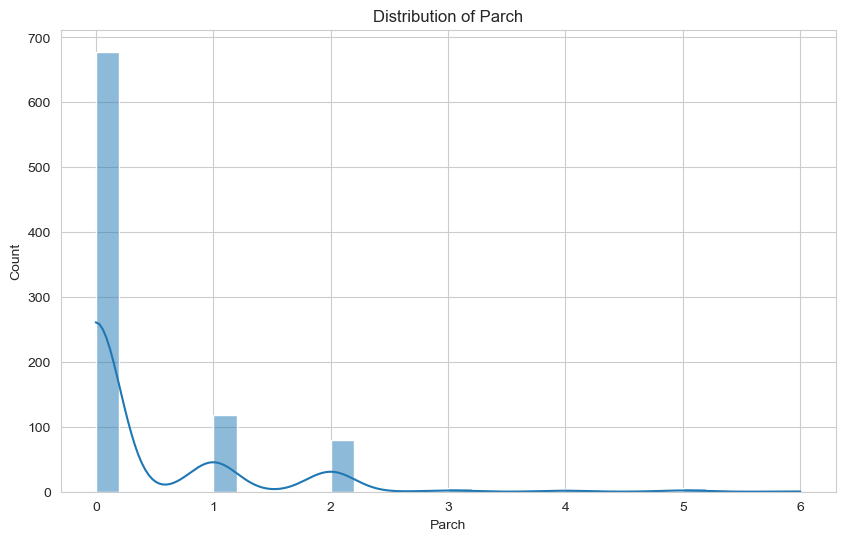

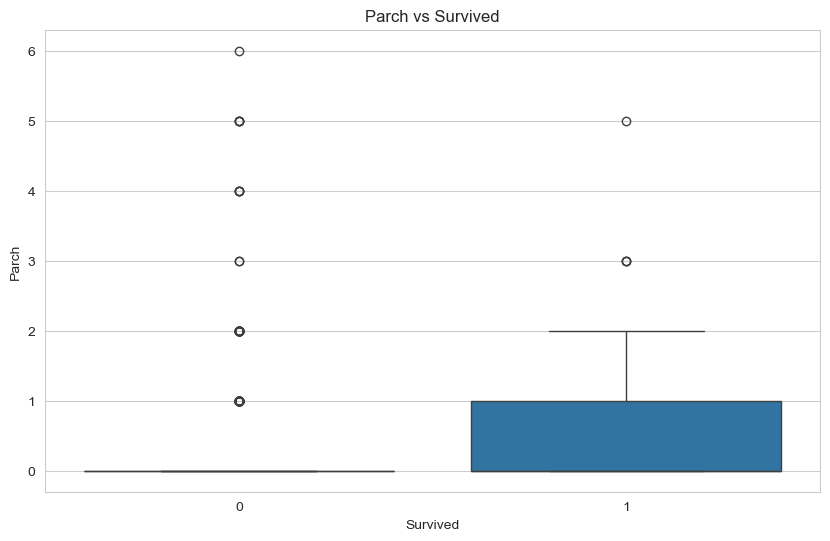

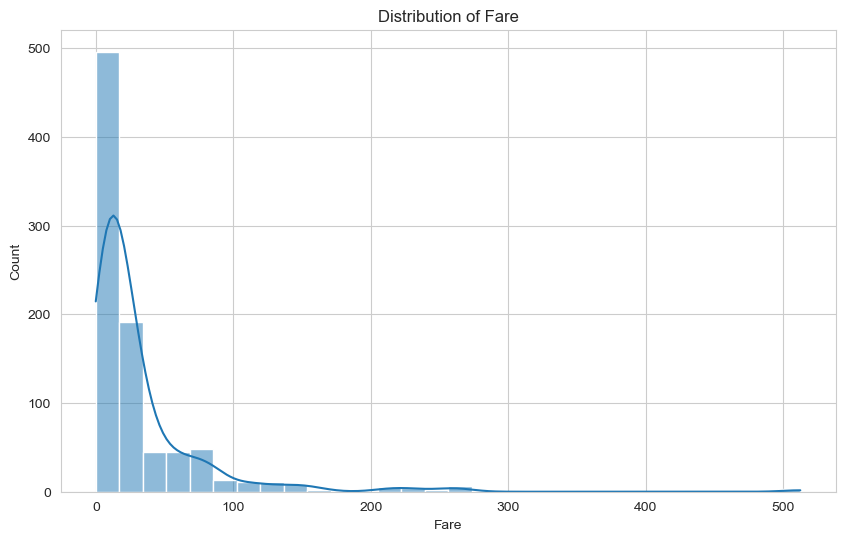

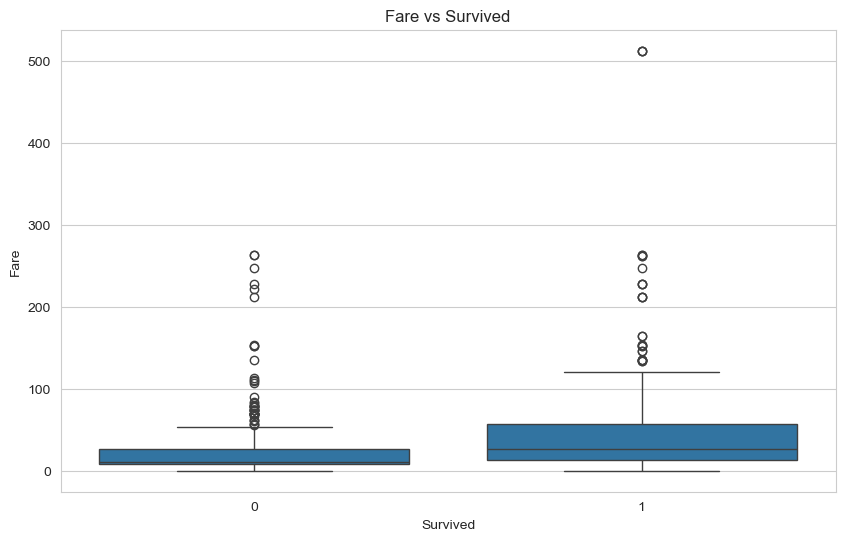

In [12]:
# Loop through all numeric features to visualize their distribution and relationship with the target variable 'Survived'
# 1. Histplot: Shows the overall distribution of the numeric column, including density estimation (KDE)
# 2. Boxplot: Compares the distribution of the numeric column between survivors (Survived=1) and non-survivors (Survived=0)
for col in numeric_features:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    sns.boxplot(data=df, x="Survived", y=col)
    plt.title(f"{col} vs Survived")
    plt.show()


In [13]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

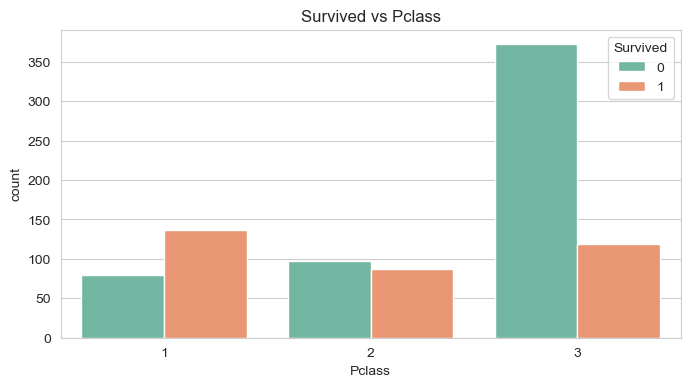

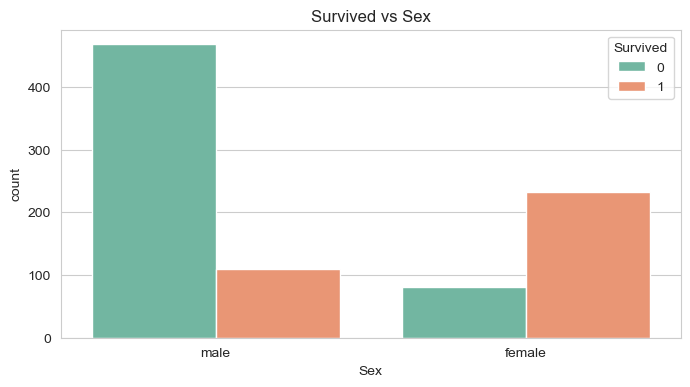

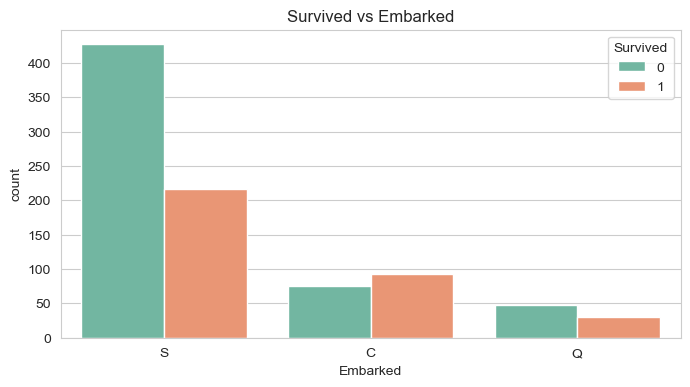

In [14]:
categorical_cols = ['Pclass', 'Sex', 'Embarked']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Survived', palette='Set2')
    plt.title(f"Survived vs {col}")
    plt.show()


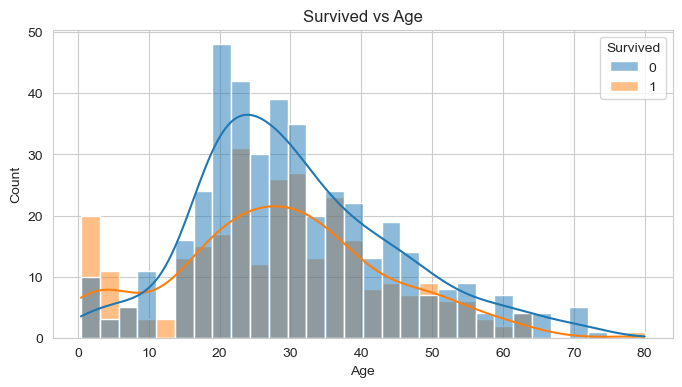

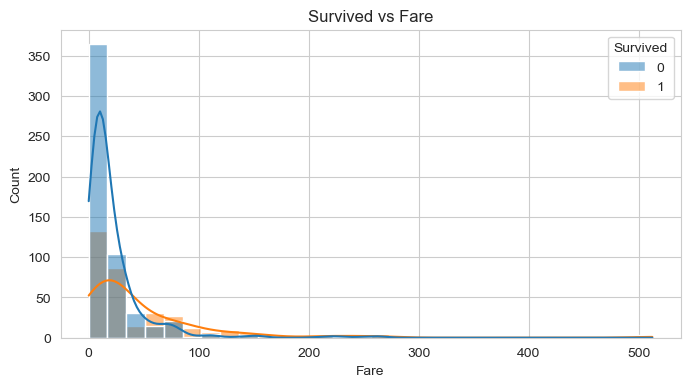

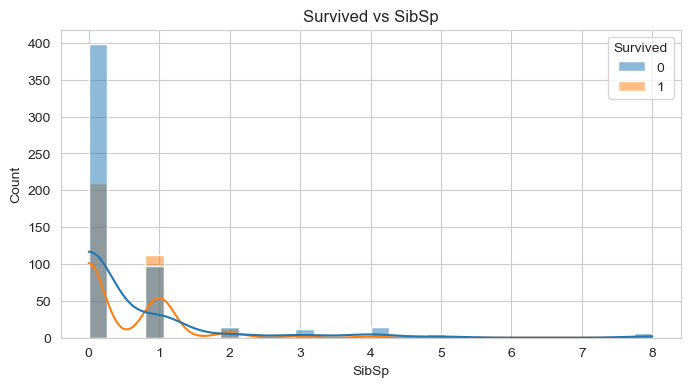

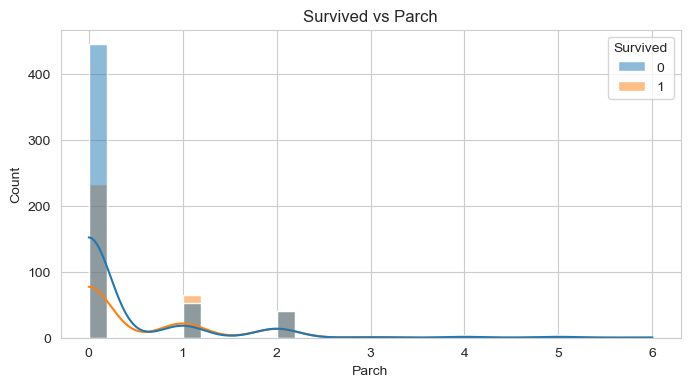

In [15]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, hue="Survived", kde=True, bins=30)
    plt.title(f"Survived vs {col}")
    plt.show()


## Data Cleaning & Preprocessing

# 🧹 Titanic Dataset - Data Cleaning Summary

**1️⃣ Missing Values Overview**
- **Age:** 177 missing (~20%) → imputed using median per `Pclass` & `Title`.  
- **Cabin:** 687 missing (~77%) → ignored, only the first letter extracted as `Deck`.  
- **Embarked:** 2 missing (~0.2%) → filled with the most frequent value.  
- **Other columns:** no missing values.

**2️⃣ Feature Engineering**
- **Title:** Extracted from `Name` (e.g., Mr, Mrs, Miss), rare titles grouped together.  
- **Deck:** First letter of `Cabin`, missing values labeled as 'Unknown'.  
- **FamilySize:** `SibSp` + `Parch` + 1, captures size of passenger’s family.

**3️⃣ Handling Missing Values**
- **Age:** Filled using median per `Pclass` & `Title`.  
- **Embarked:** Filled with mode (most frequent port).  
- **Cabin:** Ignored, only `Deck` used.  

**4️⃣ Result**
- All important columns clean and ready for EDA & modeling:  
`Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title, Deck, FamilySize`  
- Target variable: `Survived`  
- Columns ignored: `PassengerId`, `Name`, `Cabin`, `Ticket`


In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')


In [18]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return df.groupby(['Pclass','Title'])['Age'].transform('median')[row.name]
    else:
        return row['Age']

df['Age'] = df.apply(fill_age, axis=1)


In [19]:
df['Age'] = df.groupby(['Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))


In [20]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [21]:
df['Deck'] = df['Cabin'].str[0]
df['Deck'] = df['Deck'].fillna('Unknown')  


In [22]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df['Deck'] = df['Cabin'].str[0].fillna('Unknown')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

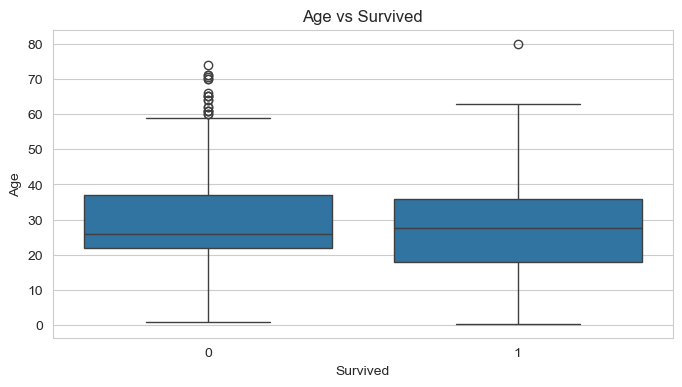

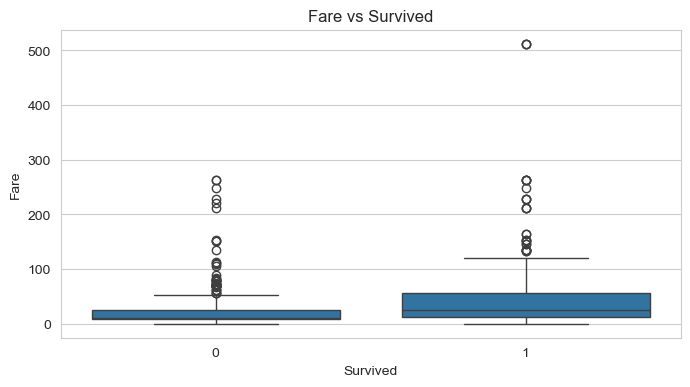

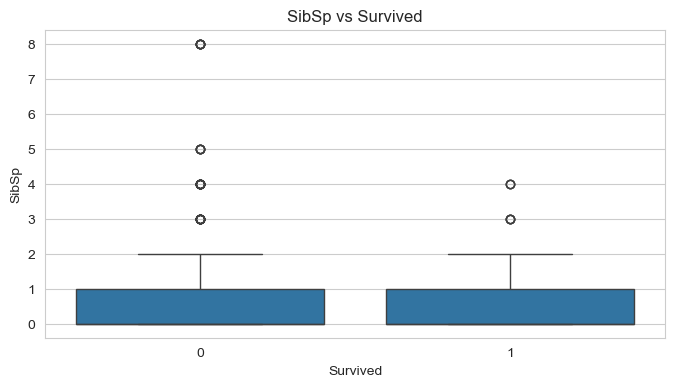

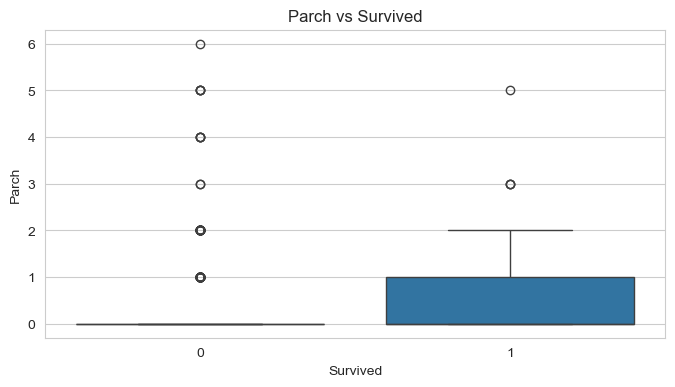

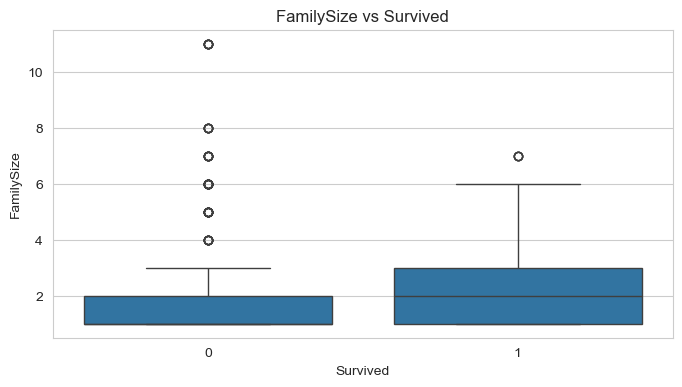

In [23]:
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

for col in numeric_features:
   
    
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='Survived', y=col)
    plt.title(f"{col} vs Survived")
    plt.show()


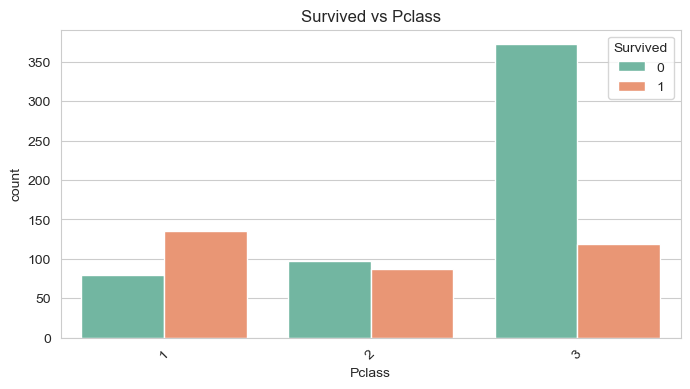

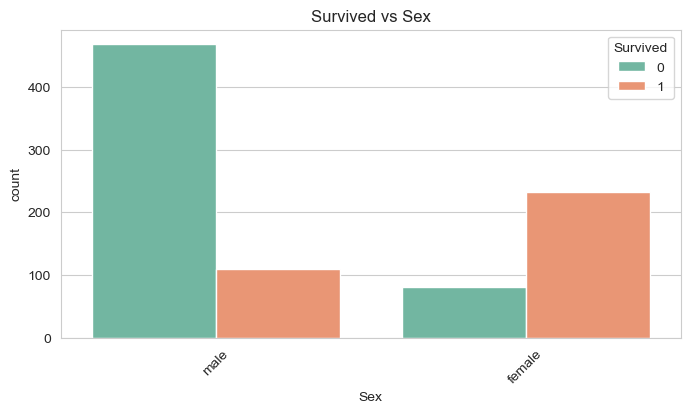

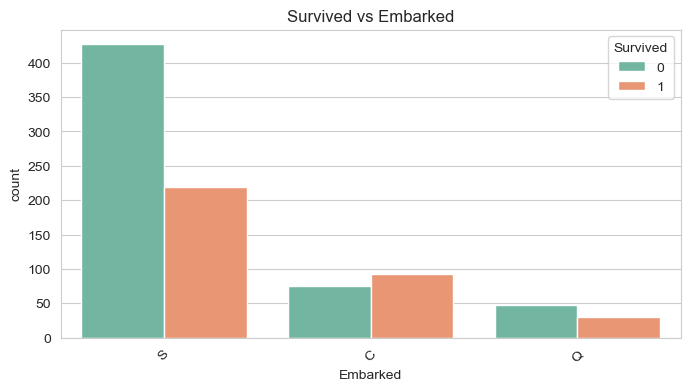

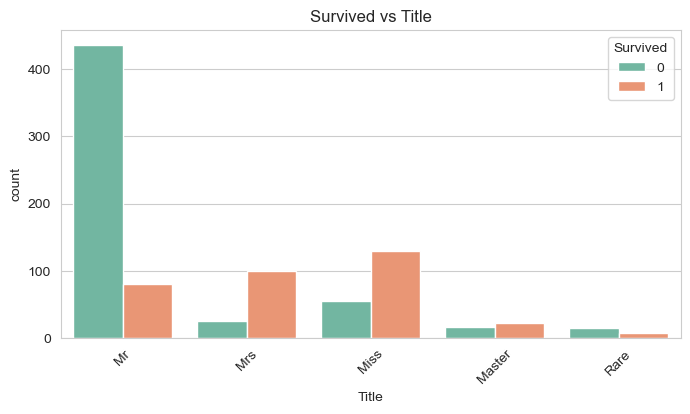

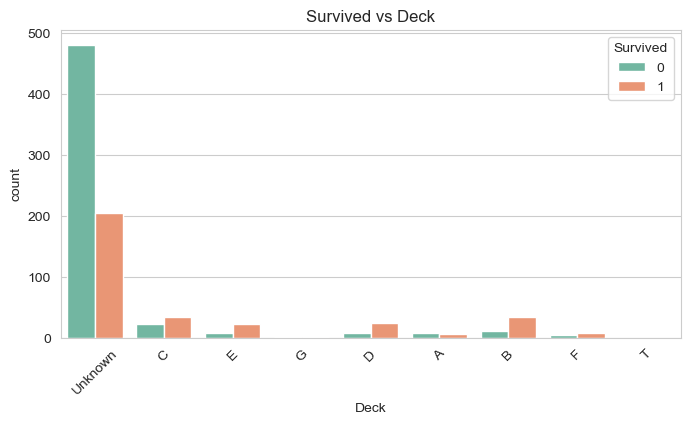

In [24]:
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck']

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Survived', palette='Set2')
    plt.title(f"Survived vs {col}")
    plt.xticks(rotation=45)
    plt.show()


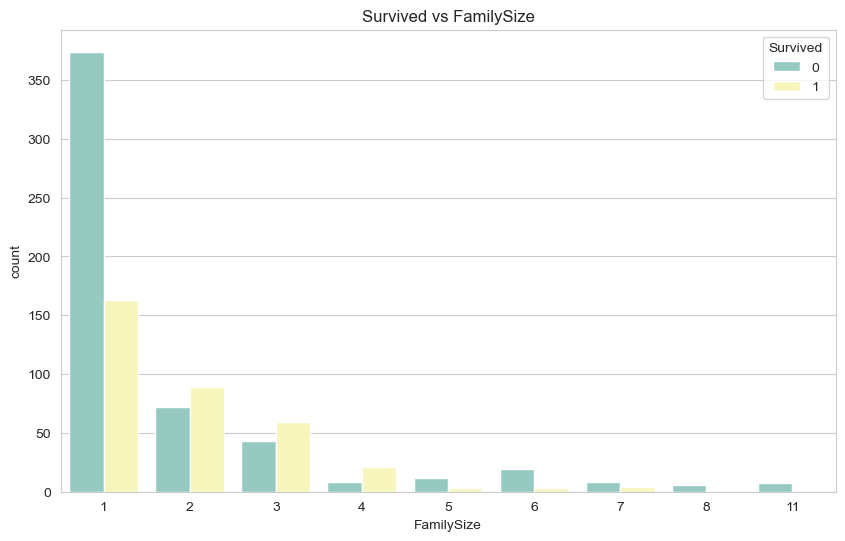

In [25]:
sns.countplot(data=df, x='FamilySize', hue='Survived', palette='Set3')
plt.title("Survived vs FamilySize")
plt.show()


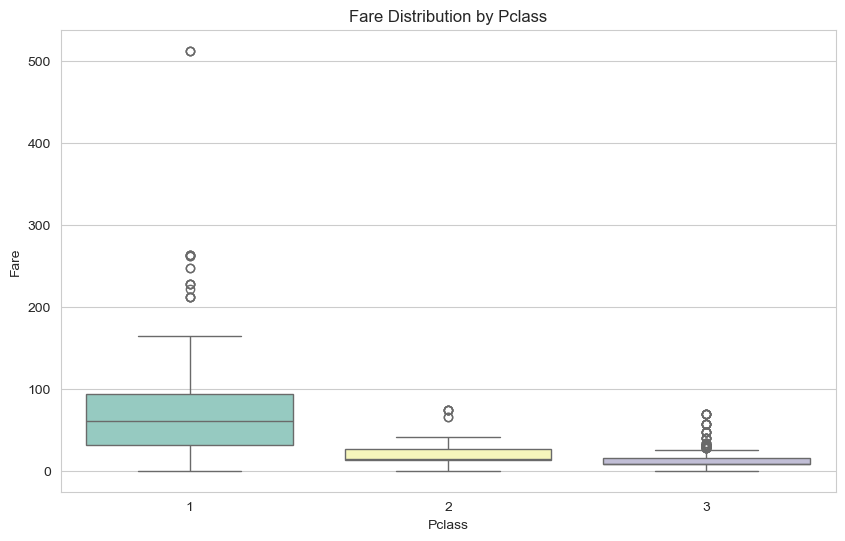

In [26]:
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set3')
plt.title("Fare Distribution by Pclass")
plt.show()


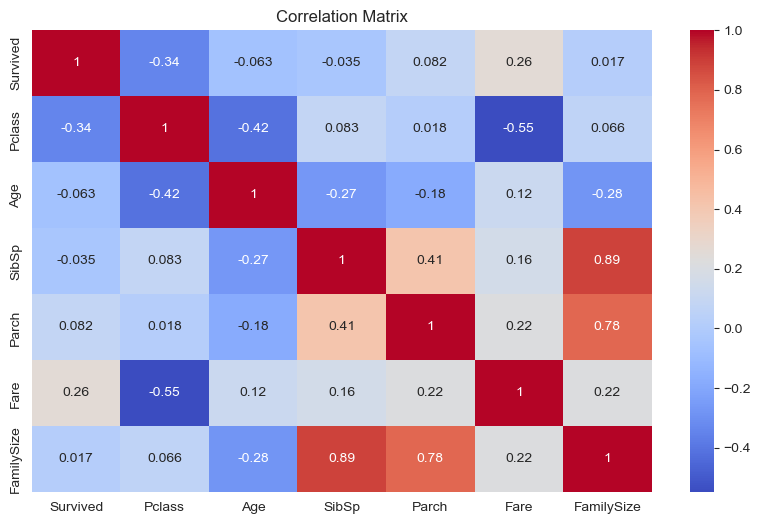

In [27]:
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [28]:
df.drop("Cabin",axis=1,inplace=True)

In [29]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           0
FamilySize     0
dtype: int64

### 2. Outlier

#### 2.1 .Age

In [30]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,FamilySize
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S,Mr,Unknown,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C,Mr,B,2
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,Mr,A,1
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q,Mr,Unknown,1
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S,Mr,B,1
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,S,Mr,C,1
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S,Miss,D,2
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,Q,Mr,Unknown,1
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,S,Mr,Unknown,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S,Mr,C,6


#### 2.2 .Fare

In [31]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C,2
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S,Mr,C,6
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,40.0,1,0,PC 17569,146.5208,C,Mrs,B,2
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C,Mr,Unknown,2
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C,Mrs,D,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,26.0,8,2,CA. 2343,69.5500,S,Mr,Unknown,11
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,40.0,1,0,17453,89.1042,C,Mrs,C,2
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S,Mrs,Unknown,3
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,18.0,8,2,CA. 2343,69.5500,S,Miss,Unknown,11


In [32]:
df.Fare.max()

512.3292

In [33]:
df.Fare.min()

0.0

In [34]:
(df['Fare'] == 0).sum()

15

In [35]:
(df['Fare'] == 512.3292).sum()

3

In [36]:
df[df['Fare'] == 0][['Pclass', 'Embarked']].value_counts()

Pclass  Embarked
2       S           6
1       S           5
3       S           4
Name: count, dtype: int64

In [37]:
df.loc[df['Fare'] == 0, 'Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.median())

In [38]:
q99 = df['Fare'].quantile(0.99)
df.loc[df['Fare'] > q99, 'Fare'] = q99


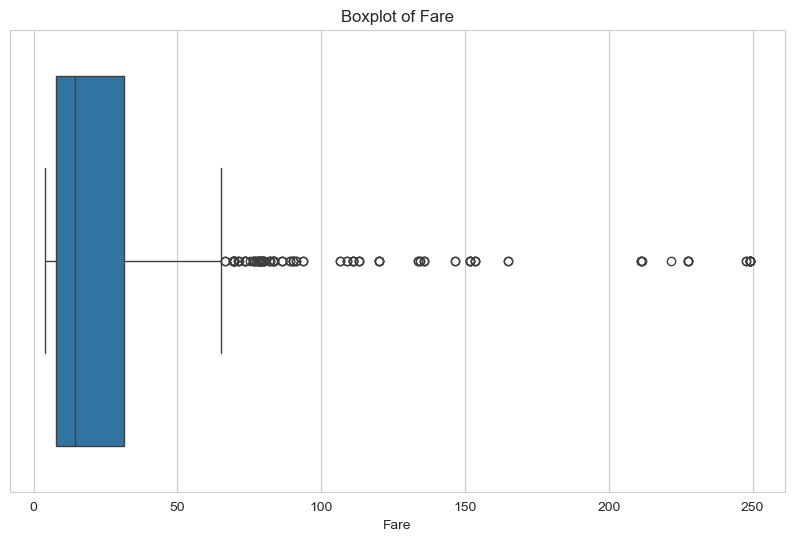

In [39]:
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

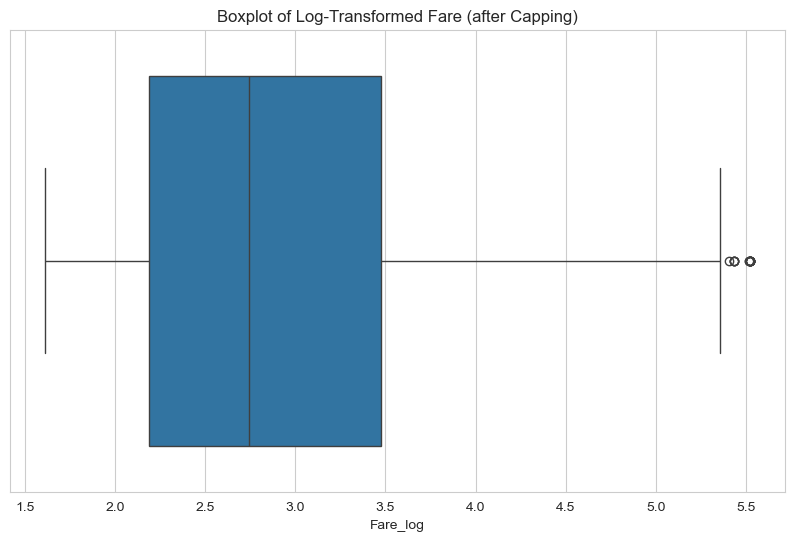

In [40]:
df['Fare_log'] = np.log1p(df['Fare'])
sns.boxplot(x=df['Fare_log'])
plt.title("Boxplot of Log-Transformed Fare (after Capping)")
plt.show()


### 🎯 Zero Fare Analysis

There are **15 passengers** with `Fare = 0.0` in the dataset:

| Pclass | Embarked | Count |
|:--:|:--:|:--:|
| 2 | S | 6 |
| 1 | S | 5 |
| 3 | S | 4 |

**Observations:**
- Zero fares are found across all classes (1st, 2nd, and 3rd), mostly from port **'S' (Southampton)**.
- These cases might represent:
  - Free or complimentary tickets (staff, guests, or infants).
  - Group bookings where some fares were recorded as zero.
  - Possible data entry issues (less likely).

**Handling options:**
- Keep them as 0 (since they are valid but rare cases).
- For modeling, consider replacing them with the **median fare** to avoid bias:
  ```python
  df.loc[df['Fare'] == 0, 'Fare'] = df[df['Fare'] > 0]['Fare'].median()


### 🧹 Handling Fare Outliers

During data exploration, we observed that the **maximum Fare value (512.33)** is significantly higher than most other fares.  
Only **3 passengers** have extremely high fares, which makes them outliers.

To handle these outliers and reduce their impact on the model, we applied **capping** and **log transformation**:

1. **Capping:**  
   Limit the Fare values to the 99th percentile to avoid the influence of extremely high prices.
   ```python
   q99 = df['Fare'].quantile(0.99)
   df.loc[df['Fare'] > q99, 'Fare'] = q99


### 🔄 Log Transformation of Fare

The `Fare` column was highly skewed with a long tail of extreme values.  
To reduce skewness and make the distribution closer to normal, a **logarithmic transformation** was applied:

```python
df['Fare_log'] = np.log1p(df['Fare'])


In [41]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked',
 'Title',
 'Deck',
 'FamilySize',
 'Fare_log']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
 12  Deck         891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  Fare_log     891 non-null    float64
dtypes: float64(3), int64(6), object(6)
memory usage: 104.5+ KB


#### 2.3 .SibSp

In [43]:
df.SibSp.max()

8

In [44]:
df.SibSp.min()

0

In [45]:
(df['SibSp'] == 8).sum()

7

### Handling Outliers in `SibSp` Column

After analyzing the data, we found 7 passengers with `SibSp = 8`, which is considered an outlier compared to most other values.

**Decision:** We will keep these values as they are when using the **Random Forest** model because:

- Random Forest is not highly sensitive to outliers.
- Keeping the original values allows the model to learn from all available data without losing important information.


#### 2.4 .Parch

In [46]:
df[["Parch"]].max()

Parch    6
dtype: int64

In [47]:
df[["Parch"]].min()

Parch    0
dtype: int64

In [48]:
(df[["Parch"]] == 6).sum()

Parch    1
dtype: int64

### Handling Outliers in `Parch` Column

After analyzing the data, we found that:

- **Maximum value (`Parch = 6`)**: A few passengers have 6 parents/children on board, which is considered an outlier.
- **Minimum value (`Parch = 0`)**: Many passengers have no parents/children on board, which is completely normal.

**Decision:** We will keep these values as they are when using the **Random Forest** model because:

- Random Forest is not highly sensitive to outliers.
- Keeping the original values allows the model to learn from all available data without losing important information.


#### 2.5 FamilySize

In [49]:
df[["FamilySize"]].max()

FamilySize    11
dtype: int64

In [50]:
df[["FamilySize"]].min()

FamilySize    1
dtype: int64

In [51]:
(df[["FamilySize"]] == 11 ).sum()

FamilySize    7
dtype: int64

### Handling Outliers in `FamilySize` Column

After analyzing the data, we found that the **maximum family size is 11**, meaning a few passengers have very large families on board.

**Decision:** We will keep these values as they are when using the **Random Forest** model because:

- Random Forest is not highly sensitive to outliers.
- Keeping the original values allows the model to learn from all available data without losing important information.


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
 12  Deck         891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  Fare_log     891 non-null    float64
dtypes: float64(3), int64(6), object(6)
memory usage: 104.5+ KB


### Target Distribution: `Survived`

In the training dataset, the distribution of the target variable is:

- **0 (Not Survived): 549 passengers**
- **1 (Survived): 342 passengers**

This shows a slight class imbalance, with more passengers not surviving than surviving.

**Decision:**  
- Models like **Random Forest** and **Logistic Regression** can handle this slight imbalance.  
- Optionally, techniques like `class_weight='balanced'` or oversampling methods (e.g., SMOTE) can be used to improve performance on the minority class (`Survived = 1`).


In [53]:
# Dropping columns that are not useful for the model:
# - 'PassengerId': just an identifier, no predictive value
# - 'Name': already extracted 'Title', so full name not needed
# - 'Ticket': ticket number usually doesn't affect survival
columns_to_drop = ['PassengerId', 'Name', 'Ticket','Fare']
df1 = df.drop(columns=columns_to_drop, axis=1)


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Embarked    891 non-null    object 
 7   Title       891 non-null    object 
 8   Deck        891 non-null    object 
 9   FamilySize  891 non-null    int64  
 10  Fare_log    891 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### 3. Preprocessing

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Embarked    891 non-null    object 
 7   Title       891 non-null    object 
 8   Deck        891 non-null    object 
 9   FamilySize  891 non-null    int64  
 10  Fare_log    891 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [56]:
# Get numerical columns (int and float types)
numeric_features1 = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get categorical columns (object type)
categorical_features1 = df1.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("Numeric features:", numeric_features1)
print()
print("Categorical features:", categorical_features1)

Numeric features: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Fare_log']

Categorical features: ['Sex', 'Embarked', 'Title', 'Deck']


### 3.1 Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()
for col in categorical_features1:
    df1[col] = le.fit_transform(df1[col])

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Embarked    891 non-null    int32  
 7   Title       891 non-null    int32  
 8   Deck        891 non-null    int32  
 9   FamilySize  891 non-null    int64  
 10  Fare_log    891 non-null    float64
dtypes: float64(2), int32(4), int64(5)
memory usage: 62.8 KB


### Training Data Preparation Completed ✅

The training dataset has been fully prepared for modeling. All necessary steps have been applied, including:

- Handling missing values (e.g., filling missing `Age` with median)
- Feature engineering:
  - `FamilySize` (SibSp + Parch + 1)
  - `IsAlone` (1 if traveling alone, 0 otherwise)
  - `Title` extracted from `Name`
  - `Fare_per_person` (Fare divided by FamilySize)
- Encoding categorical features (`Sex`, `Embarked`, `Title`, `Deck`)
- Optional scaling (if using models sensitive to feature magnitude)

The dataset is now ready to train machine learning models.


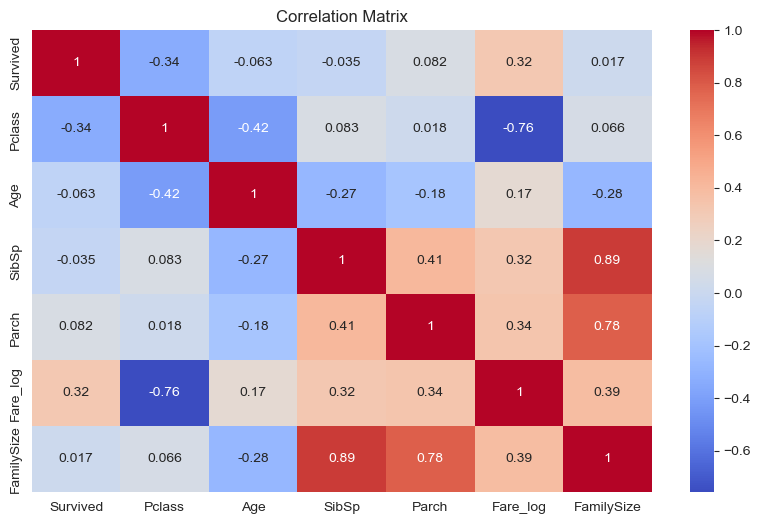

In [60]:
corr = df1[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare_log', 'FamilySize']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Testing Data

In [61]:
df_test = test_data.copy()

In [62]:
missing_values = df_test.isnull().sum()
missing_percent = (missing_values / len(df_test)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percent": missing_percent})
missing_data.sort_values("Percent", ascending=False)


,Missing Values,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [63]:
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df_test['Title'] = df_test['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df_test['Title'] = df_test['Title'].replace(['Mlle','Ms'], 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')

In [64]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return df.groupby(['Pclass','Title'])['Age'].transform('median')[row.name]
    else:
        return row['Age']

df_test['Age'] = df_test.apply(fill_age, axis=1)


In [65]:
df_test['Age'] = df_test.groupby(['Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))


In [66]:
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])

In [67]:
df_test['Deck'] = df_test['Cabin'].str[0]
df_test['Deck'] = df_test['Deck'].fillna('Unknown')  


In [68]:
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df_test['Title'] = df_test['Title'].replace(['Mlle','Ms'], 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')

df_test['Deck'] = df_test['Cabin'].str[0].fillna('Unknown')
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [69]:
df_test.drop("Cabin",axis=1,inplace=True)

In [70]:
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [71]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           0
FamilySize     0
dtype: int64

In [72]:
df_test.loc[df_test['Fare'] == 0, 'Fare'] = df_test.groupby('Pclass')['Fare'].transform(lambda x: x.median())

In [73]:
q99 = df_test['Fare'].quantile(0.99)
df_test.loc[df_test['Fare'] > q99, 'Fare'] = q99


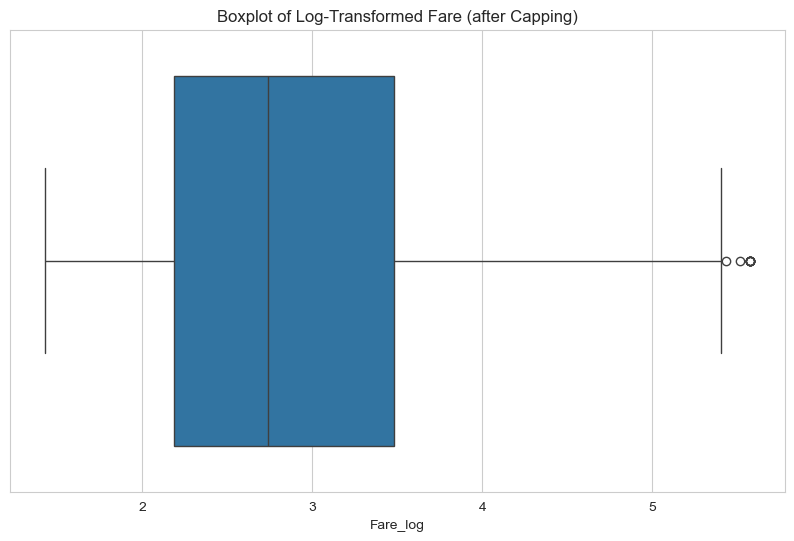

In [74]:
df_test['Fare_log'] = np.log1p(df_test['Fare'])
sns.boxplot(x=df_test['Fare_log'])
plt.title("Boxplot of Log-Transformed Fare (after Capping)")
plt.show()


In [75]:
# Dropping columns that are not useful for the model:
# - 'PassengerId': just an identifier, no predictive value
# - 'Name': already extracted 'Title', so full name not needed
# - 'Ticket': ticket number usually doesn't affect survival
columns_to_drop = ['PassengerId', 'Name', 'Ticket','Fare']
df2 = df_test.drop(columns=columns_to_drop, axis=1)

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Embarked    418 non-null    object 
 6   Title       418 non-null    object 
 7   Deck        418 non-null    object 
 8   FamilySize  418 non-null    int64  
 9   Fare_log    418 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [77]:
# Get numerical columns (int and float types)
numeric_features2 = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get categorical columns (object type)
categorical_features2 = df2.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("Numeric features:", numeric_features1)
print()
print("Categorical features:", categorical_features1)

Numeric features: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Fare_log']

Categorical features: ['Sex', 'Embarked', 'Title', 'Deck']


In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()
for col in categorical_features2:
    df2[col] = le.fit_transform(df2[col])

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int32  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Embarked    418 non-null    int32  
 6   Title       418 non-null    int32  
 7   Deck        418 non-null    int32  
 8   FamilySize  418 non-null    int64  
 9   Fare_log    418 non-null    float64
dtypes: float64(2), int32(4), int64(4)
memory usage: 26.3 KB


# ✅ Test Data Preprocessing Completed

All necessary preprocessing steps have been applied to the test dataset, including:

- Handling missing values
- Encoding categorical features
- Feature engineering (e.g., `Title`, `Deck`, `FamilySize`)
- Scaling numeric features (if applied)

The test dataset is now ready for model prediction.


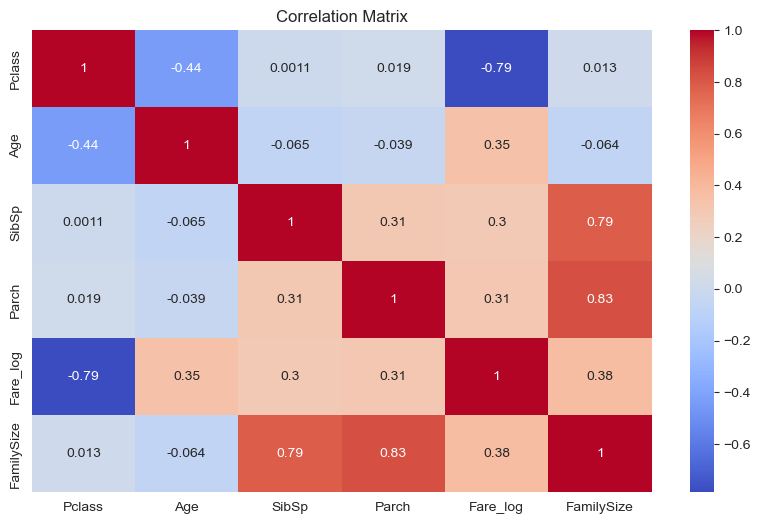

In [81]:
corr = df2[[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare_log', 'FamilySize']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [82]:
df1.columns.tolist()

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Embarked',
 'Title',
 'Deck',
 'FamilySize',
 'Fare_log']

In [83]:
df2.columns.tolist()

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Embarked',
 'Title',
 'Deck',
 'FamilySize',
 'Fare_log']

In [84]:
print(df1.info())
print()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Embarked    891 non-null    int32  
 7   Title       891 non-null    int32  
 8   Deck        891 non-null    int32  
 9   FamilySize  891 non-null    int64  
 10  Fare_log    891 non-null    float64
dtypes: float64(2), int32(4), int64(5)
memory usage: 62.8 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int32  
 2   Age         418 non-n

## 4. Model ML  (Random Forest)

## 1️⃣ Import Libraries

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## 2️⃣ Prepare Features and Target

In [86]:
# Select features
X_train = df1.drop('Survived', axis=1)
y_train = df1['Survived']
X_test = df2.copy()

print(X_train.shape)
print()
print(y_train.shape)
print()
print(X_test.shape)


(891, 10)

(891,)

(418, 10)


## 3️⃣ Train Random Forest Model

In [87]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 4️⃣ Cross-Validation Accuracy (optional, for evaluation)

In [88]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-validation Accuracy Scores: [0.83333333 0.84269663 0.7752809  0.86516854 0.84269663 0.80898876
 0.82022472 0.7752809  0.88764045 0.84269663]
Mean CV Accuracy: 0.8294007490636703


## 5️⃣ Make Predictions on Test Set

In [89]:
predictions = rf_model.predict(X_test)
test_data['Survived_Pred'] = predictions


## 6️⃣ Save Predictions to CSV

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission file has been successfully saved!")


## XGBoost model

In [90]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=1)
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Mean CV Accuracy:", scores.mean())


Mean CV Accuracy: 0.8350072186303434


### Random Forest vs XGBoost Comparison

**Random Forest**  
- Cross-validation Accuracy Scores: [0.833, 0.843, 0.775, 0.865, 0.843, 0.809, 0.820, 0.775, 0.888, 0.843]  
- Mean CV Accuracy: ~0.829 (~82.9%)  
- Observations:  
  - Stable performance, mostly above 0.8  
  - Slight overfitting possible if max_depth is too high  
  - Good baseline model for structured data  

**XGBoost**  
- Cross-validation Mean Accuracy: ~0.835 (~83.5%)  
- Observations:  
  - Slightly higher CV accuracy than Random Forest (~0.6% improvement)  
  - Learns iteratively from errors → better generalization  
  - Performs better on small-to-medium structured datasets with categorical features  

**Comparison Table**

| Metric                     | Random Forest | XGBoost |
|-----------------------------|---------------|---------|
| Mean CV Accuracy            | 0.829         | 0.835   |
| Typical Score Range (10 folds) | 0.775 – 0.888 | 0.835 |
| Strengths                   | Stable, simple, less tuning needed | Slightly higher accuracy, better generalization |
| Weaknesses                  | Can overfit if deep, less flexible | Slightly slower, needs hyperparameter tuning |

**Conclusion:**  
- Both models perform well on Titanic data  
- XGBoost has a small edge in accuracy and generalization  
- For Kaggle submissions, XGBoost (or CatBoost / LightGBM) is usually preferred if aiming for maximum accuracy
